In [72]:
from my_utils import loader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
importlib.reload(loader)

<module 'my_utils.loader' from '/workspaces/Thesis/Gaze_4_behavioural_biometrics/my_utils/loader.py'>

In [73]:
import warnings;
warnings.filterwarnings('ignore');

In [87]:
def get_df_features(features_train, features_test, labels_train, labels_test, fix= True):
    if fix:
        features = [
                "B_00",
                "B_01",
                "B_11",
                "B_sd_00",
                "B_sd_01",
                "B_sd_11",
                "Sigma_00",
                "Sigma_01",
                "Sigma_11",
                "Sigma_sd_00",
                "Sigma_sd_01",
                "Sigma_sd_11",
                "dur",
                "pupil_diam_left",
                "pupil_diam_right"
        ]
    else:
        features = [
                "B_00",
                "B_01",
                "B_11",
                "B_sd_00",
                "B_sd_01",
                "B_sd_11",
                "Sigma_00",
                "Sigma_01",
                "Sigma_11",
                "Sigma_sd_00",
                "Sigma_sd_01",
                "Sigma_sd_11",
                "angle",
                "ampl",
                "dur"

        ]
    features_train = pd.DataFrame(features_train)
    features_train.columns = features
    features_train["empathy"] = [1 if level > labels_train.mean() else 0 for level in labels_train]
    features_test = pd.DataFrame(features_test)
    features_test.columns = features
    features_test["empathy"] = [1 if level > labels_train.mean() else 0 for level in labels_test]
    return features_train.append(features_test)


## __Free Viewing__

### __General empathy__

#### __Fixations__

In [75]:
free_fix_features_train, free_fix_labels_train, _, _  = loader.get_eyeT_features_and_labels("train", "free", normalize=False)
free_fix_features_test, free_fix_labels_test, _, _  = loader.get_eyeT_features_and_labels("test", "free", normalize=False)
free_fix_features_df = get_df_features(free_fix_features_train, free_fix_features_test, free_fix_labels_train, free_fix_labels_test)
free_fix_features_df.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.110331,-0.035936,0.228929,0.086392,0.081327,0.190478,3870.056906,-203.016014,6502.328080,1236.941316,127.965154,2033.388142,0.441667,3.751667,3.835556,1
1,0.162957,-0.030315,0.143296,0.132375,0.073093,0.118323,5919.758407,262.692483,2150.165632,2283.920144,157.244366,808.730527,0.258333,3.666364,3.506364,1
2,0.120986,-0.030797,0.313196,0.103506,0.084616,0.261018,1803.946801,-173.242424,6269.595160,889.816202,108.949268,2935.288985,0.133333,3.520000,3.494000,1
3,0.182630,-0.054035,0.332319,0.149208,0.117020,0.287857,4566.444590,-251.885598,4525.703988,1761.539075,148.008361,1756.688213,0.241667,3.393000,3.340000,1
4,0.093385,-0.048397,0.363872,0.079923,0.087737,0.296927,4666.507266,-290.715189,1986.284175,1834.759499,135.719685,768.906353,0.233333,3.395556,3.356667,1


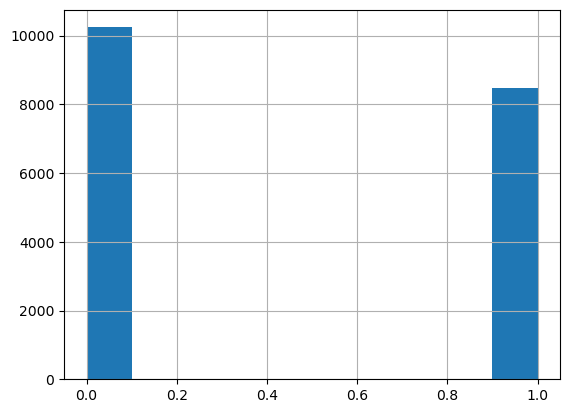

In [76]:
free_fix_features_df["empathy"].hist();

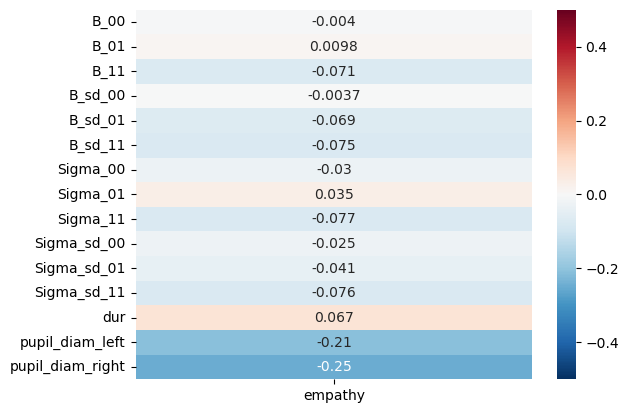

In [77]:
sns.heatmap(free_fix_features_df.corr().loc[free_fix_features_df.columns[:-1], ["empathy"]], cmap='RdBu_r', annot=True, vmin=-0.5, vmax = 0.5);

In [78]:
display(free_fix_features_df.groupby("empathy")[free_fix_features_df.columns].mean())

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,dur,pupil_diam_left,pupil_diam_right,empathy
empathy,,,,,,,,,,,,,,,,
0,0.558862,-0.131970,2.516632,0.196380,0.190346,1.771778,6723.124444,-45.515208,12938.913974,2968.742296,159.763648,5438.540712,0.210425,3.701201,3.697981,0.0
1,0.457111,-0.124352,1.686126,0.187864,0.163533,1.185270,6309.290701,-24.405407,11216.137337,2815.310939,154.394717,4736.252257,0.236605,3.425507,3.385594,1.0


#### __Saccades__

In [88]:
_, _, free_sac_features_train, free_sac_labels_train = loader.get_eyeT_features_and_labels("train", "free", normalize=False)
_, _, free_sac_features_test, free_sac_labels_test = loader.get_eyeT_features_and_labels("test", "free", normalize=False)
free_sac_features_df = get_df_features(free_sac_features_train, free_sac_features_test, free_sac_labels_train, free_sac_labels_test, fix=False)
free_sac_features_df.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,angle,ampl,dur,empathy
0,0.292484,-0.079091,0.409823,0.248697,0.166419,0.342367,19983.448535,613.037838,29105.438658,11324.087109,342.014099,16061.146755,32.005383,66.037868,0.033333,1
1,4.071239,-3.193822,3.144788,1.168347,0.892471,1.411674,23610.869529,-643.642086,41287.554069,11144.442518,329.557724,18452.826468,-21.072727,116.811814,0.041667,1
2,1.017992,0.927779,3.393567,0.220507,0.264572,1.116953,1145.564462,92.709579,11696.337217,765.551079,83.451698,6419.589652,-153.239401,131.034347,0.050000,1
3,1.461577,1.122452,3.769780,0.585639,0.439224,1.590885,31231.680353,525.718856,20594.184312,13710.863124,360.282412,9672.216669,-146.633634,196.367003,0.083333,1
4,0.471184,-1.968567,10.781178,0.226696,0.576344,3.063857,47449.909323,-668.940041,7960.845796,17325.174634,213.233327,4382.738495,98.759701,321.753011,0.041667,1


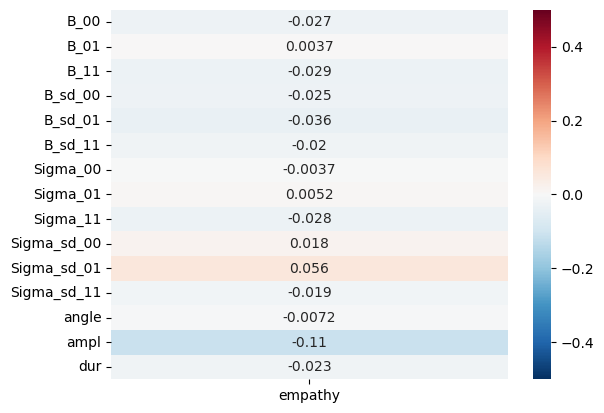

In [89]:
sns.heatmap(free_sac_features_df.corr().loc[free_sac_features_df.columns[:-1], ["empathy"]], cmap='RdBu_r', annot=True, vmin=-0.5, vmax = 0.5);

### __Cognitive empathy__

#### __Fixations__

In [94]:
free_fix_features_cog_train, free_fix_labels_cog_train, _, _  = loader.get_eyeT_features_and_labels("train", "free", type="cognitive", normalize=False)
free_fix_features_cog_test, free_fix_labels_cog_test, _, _  = loader.get_eyeT_features_and_labels("test", "free", type= "cognitive", normalize=False)
free_fix_features_cog_df = get_df_features(free_fix_features_cog_train, free_fix_features_cog_test, free_fix_labels_cog_train, free_fix_labels_cog_test)
free_fix_features_cog_df.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.110331,-0.035936,0.228929,0.086392,0.081327,0.190478,3870.056906,-203.016014,6502.328080,1236.941316,127.965154,2033.388142,0.441667,3.751667,3.835556,1
1,0.162957,-0.030315,0.143296,0.132375,0.073093,0.118323,5919.758407,262.692483,2150.165632,2283.920144,157.244366,808.730527,0.258333,3.666364,3.506364,1
2,0.120986,-0.030797,0.313196,0.103506,0.084616,0.261018,1803.946801,-173.242424,6269.595160,889.816202,108.949268,2935.288985,0.133333,3.520000,3.494000,1
3,0.182630,-0.054035,0.332319,0.149208,0.117020,0.287857,4566.444590,-251.885598,4525.703988,1761.539075,148.008361,1756.688213,0.241667,3.393000,3.340000,1
4,0.093385,-0.048397,0.363872,0.079923,0.087737,0.296927,4666.507266,-290.715189,1986.284175,1834.759499,135.719685,768.906353,0.233333,3.395556,3.356667,1


In [180]:
sub = free_fix_features_df.subtract(free_fix_features_cog_df)
high_general_low_cog = sub[sub.empathy == -1].index
low_general_high_cog = sub[sub.empathy == 1].index
compare = free_fix_features_df.mean(axis=0).compare(free_fix_features_df.iloc[high_general_low_cog].mean(axis=0)).rename(columns = {"self": "normal", "other":"high general low cog"})[:-1]
compare["low general high cog"] = free_fix_features_df.mean(axis=0).compare(free_fix_features_df.iloc[low_general_high_cog].mean(axis=0)).rename(columns = {"self": "normal", "other":"low general high cog"})[:-1]["low general high cog"]
compare

,normal,high general low cog,low general high cog
B_00,0.512811,0.584982,0.176012
B_01,-0.128522,-0.184791,-0.160960
B_11,2.140756,2.719266,1.585768
B_sd_00,0.192526,0.252206,0.123134
B_sd_01,0.178211,0.233767,0.150209
B_sd_11,1.506332,1.910225,1.066809
Sigma_00,6535.828619,8983.791984,3689.002768
Sigma_01,-35.961184,-2.443304,-46.714423
Sigma_11,12159.207443,17226.218563,10868.366992
Sigma_sd_00,2899.301238,3982.050340,1609.177694


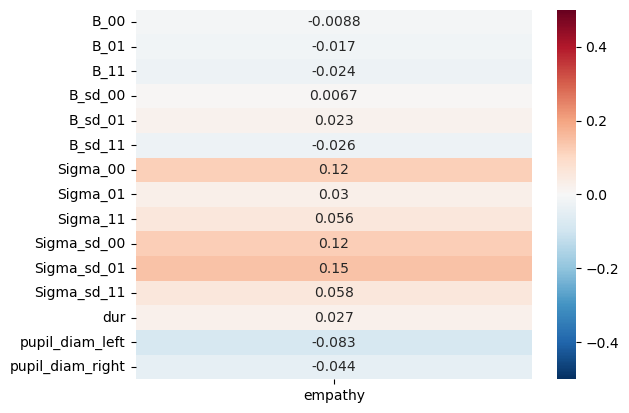

In [181]:
sns.heatmap(free_fix_features_cog_df.corr().loc[free_fix_features_cog_df.columns[:-1], ["empathy"]], cmap='RdBu_r', annot=True, vmin=-0.5, vmax = 0.5);

#### __Saccades__

In [183]:
_, _ , free_sac_features_cog_train, free_sac_labels_cog_train = loader.get_eyeT_features_and_labels("train", "free", type="cognitive", normalize=False)
_, _, free_sac_features_cog_test, free_sac_labels_cog_test  = loader.get_eyeT_features_and_labels("test", "free", type= "cognitive", normalize=False)
free_sac_features_cog_df = get_df_features(free_sac_features_cog_train, free_sac_features_cog_test, free_sac_labels_cog_train, free_sac_labels_cog_test)
free_sac_features_cog_df.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.292484,-0.079091,0.409823,0.248697,0.166419,0.342367,19983.448535,613.037838,29105.438658,11324.087109,342.014099,16061.146755,32.005383,66.037868,0.033333,1
1,4.071239,-3.193822,3.144788,1.168347,0.892471,1.411674,23610.869529,-643.642086,41287.554069,11144.442518,329.557724,18452.826468,-21.072727,116.811814,0.041667,1
2,1.017992,0.927779,3.393567,0.220507,0.264572,1.116953,1145.564462,92.709579,11696.337217,765.551079,83.451698,6419.589652,-153.239401,131.034347,0.050000,1
3,1.461577,1.122452,3.769780,0.585639,0.439224,1.590885,31231.680353,525.718856,20594.184312,13710.863124,360.282412,9672.216669,-146.633634,196.367003,0.083333,1
4,0.471184,-1.968567,10.781178,0.226696,0.576344,3.063857,47449.909323,-668.940041,7960.845796,17325.174634,213.233327,4382.738495,98.759701,321.753011,0.041667,1


In [184]:
sub = free_sac_features_df.subtract(free_sac_features_cog_df)
high_general_low_cog = sub[sub.empathy == -1].index
low_general_high_cog = sub[sub.empathy == 1].index
compare = free_sac_features_df.mean(axis=0).compare(free_sac_features_df.iloc[high_general_low_cog].mean(axis=0)).rename(columns = {"self": "normal", "other":"high general low cog"})[:-1]
compare["low general high cog"] = free_sac_features_df.mean(axis=0).compare(free_sac_features_df.iloc[low_general_high_cog].mean(axis=0)).rename(columns = {"self": "normal", "other":"low general high cog"})[:-1]["low general high cog"]
compare

,normal,high general low cog,low general high cog
B_00,3.258788,3.665612,3.181404
B_01,-0.848716,-0.808518,-0.865864
B_11,7.331236,7.570557,6.163385
B_sd_00,1.122849,1.356623,0.991700
B_sd_01,0.645465,0.698062,0.575914
B_sd_11,3.702217,3.790993,3.037915
Sigma_00,25147.514698,25906.142673,24363.727281
Sigma_01,44.392164,47.906256,17.690412
Sigma_11,24682.403522,27531.946043,21955.659841
Sigma_sd_00,10455.237862,10565.023051,10055.924234


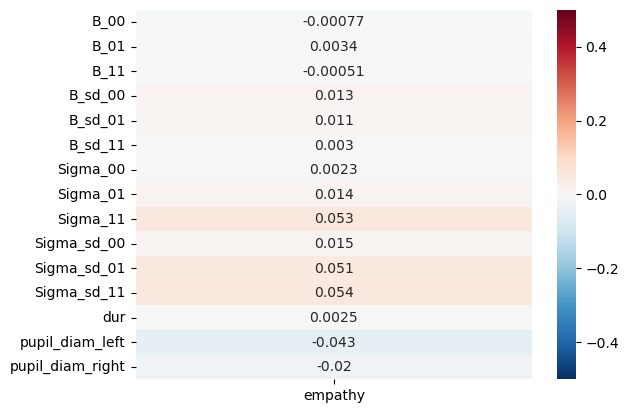

In [185]:
sns.heatmap(free_sac_features_cog_df.corr().loc[free_sac_features_cog_df.columns[:-1], ["empathy"]], cmap='RdBu_r', annot=True, vmin=-0.5, vmax = 0.5);

## __Task oriented__

### __Fixations__

In [79]:
task_fix_features_train, task_fix_labels_train, _, _  = loader.get_eyeT_features_and_labels("train", "task", normalize=False)
task_fix_features_test, task_fix_labels_test, _, _  = loader.get_eyeT_features_and_labels("test", "task", normalize=False)
task_fix_features_df = get_df_features(task_fix_features_train, task_fix_features_test, task_fix_labels_train, task_fix_labels_test)
task_fix_features_df.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.164539,-0.061940,1.431889,0.134797,0.188955,0.747894,964.943433,-66.028797,2713.739471,412.817694,86.133104,1100.776926,0.200000,3.453750,3.793750,1
1,0.061676,-0.033349,0.157567,0.047500,0.053294,0.130187,2370.777979,-199.053929,1886.994193,919.008506,92.111794,738.418932,0.250000,3.280909,3.444545,1
2,0.033951,-0.038630,0.460826,0.026888,0.064519,0.319218,1930.507759,-32.866106,3020.095700,679.041884,102.478473,1038.226131,0.341667,3.185000,3.335714,1
3,0.167818,-0.017955,0.056880,0.147735,0.044247,0.048554,2345.778619,62.228319,1876.953657,1049.415878,123.172087,822.206191,0.166667,3.114286,3.372857,1
4,0.090277,-0.022391,0.157615,0.078360,0.051715,0.135423,5189.508755,-246.081473,7233.252923,2187.803735,157.637629,2996.679359,0.183333,3.200000,3.441429,1


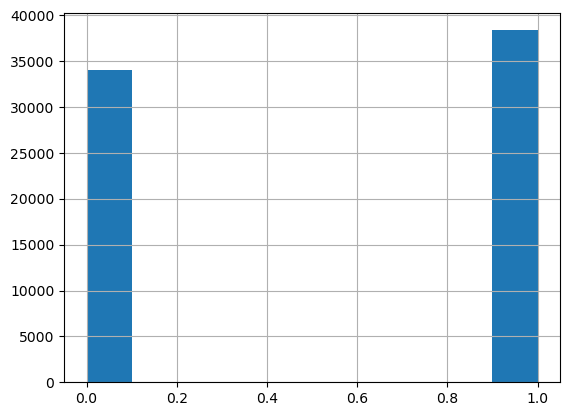

In [80]:
task_fix_features_df["empathy"].hist();

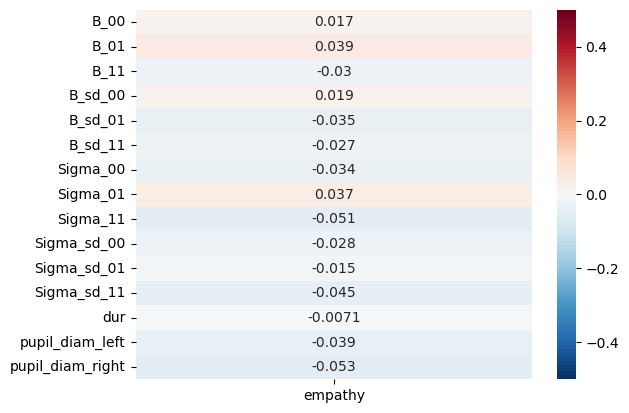

In [81]:
sns.heatmap(task_fix_features_df.corr().loc[task_fix_features_df.columns[:-1], ["empathy"]], cmap='RdBu_r', annot=True, vmin=-0.5, vmax = 0.5);

### __Saccades__

In [90]:
_, _, task_sac_features_train, task_sac_labels_train = loader.get_eyeT_features_and_labels("train", "task", normalize=False)
_, _, task_sac_features_test, task_sac_labels_test = loader.get_eyeT_features_and_labels("test", "task", normalize=False)
task_sac_features_df = get_df_features(task_sac_features_train, task_sac_features_test, task_sac_labels_train, task_sac_labels_test, fix=False)
task_sac_features_df.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,angle,ampl,dur,empathy
0,0.396928,-0.376016,0.928510,0.269504,0.309568,0.788508,45464.886592,997.404092,24236.778170,15387.794127,233.225075,9631.989439,62.414794,477.252554,0.075000,1
1,0.195403,-0.242040,0.529258,0.110225,0.145724,0.403496,45804.690432,1008.386059,35205.681500,16178.298630,235.012344,13101.079890,61.439605,822.029805,0.083333,1
2,1.085157,1.770526,7.037144,0.223660,0.350256,2.195001,2496.124317,114.942410,20496.146843,1723.195959,113.002127,9095.461535,-159.405910,176.264007,0.033333,1
3,13.500554,-4.055343,1.422967,5.371650,1.336347,0.688610,20358.939306,-583.821896,25139.225615,7551.208200,147.006436,9553.448395,-62.359659,857.906755,0.066667,1
4,0.012692,-0.071673,18.769406,0.009177,0.247994,11.675740,39717.799966,-651.804510,8633.317212,14587.232699,174.258485,3762.951499,129.568784,1053.368407,0.066667,1


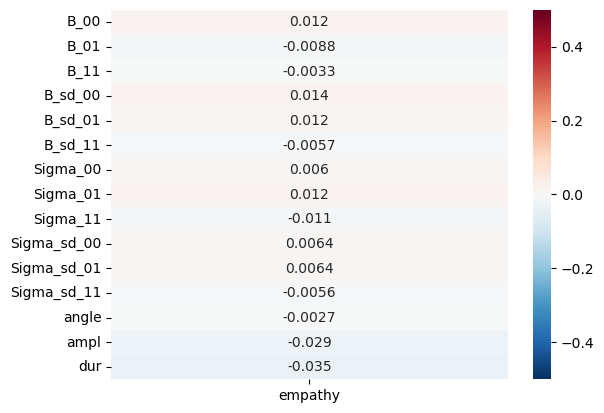

In [91]:
sns.heatmap(task_sac_features_df.corr().loc[task_sac_features_df.columns[:-1], ["empathy"]], cmap='RdBu_r', annot=True, vmin=-0.5, vmax = 0.5);